In [6]:
import easyocr
import cv2
from matplotlib import pyplot as plt
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import pandas as pd

In [7]:
plt.rcParams["figure.figsize"] = [20,20]

In [8]:
image_path = "Merged_document.tiff"
img = Image.open(image_path)

reader = easyocr.Reader(['ko', 'en'], gpu=False)

Using CPU. Note: This module is much faster with a GPU.


1
['C:\\Users\\Chan/.EasyOCR//model\\craft_mlt_25k.pth']


In [9]:
nogada_df = pd.DataFrame(columns = ["id","page","class"])


페이지 번호 0


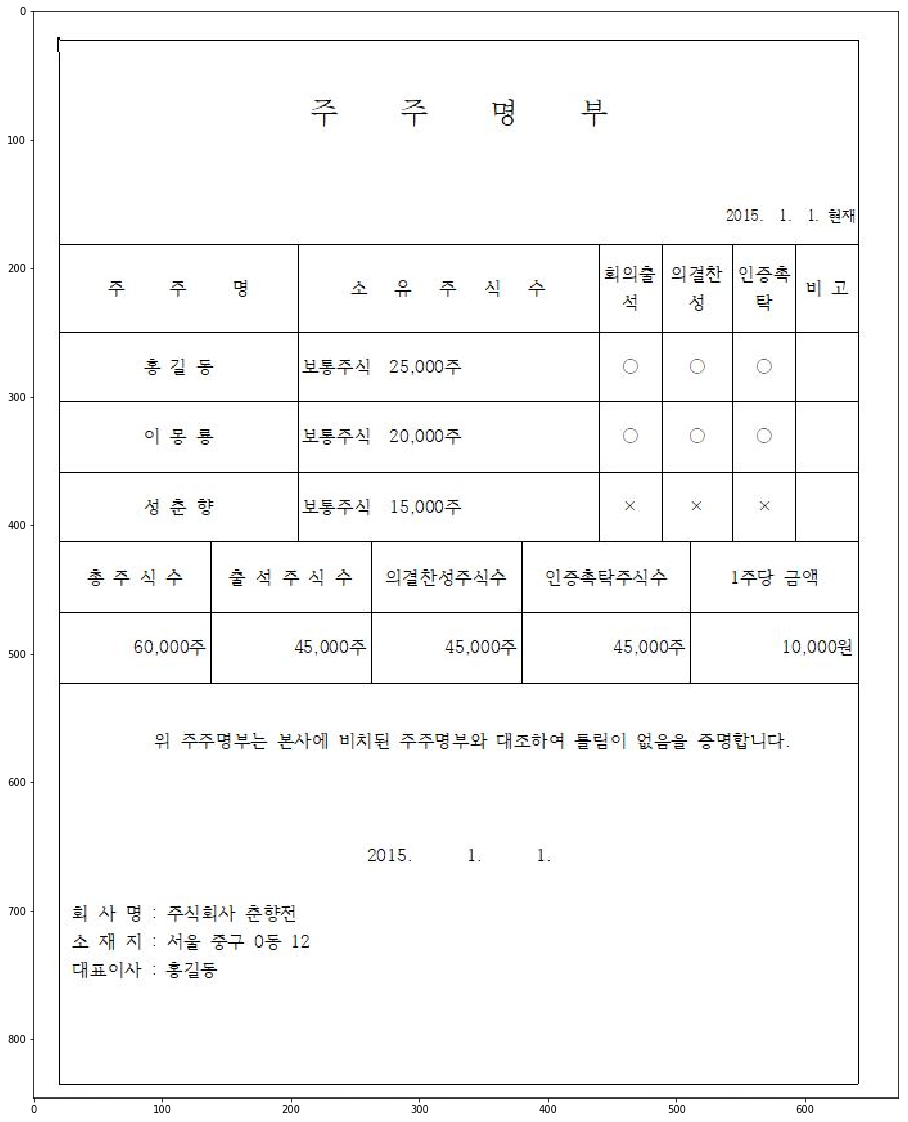

Wall time: 9.27 s
text0
주주명부

페이지 번호 1


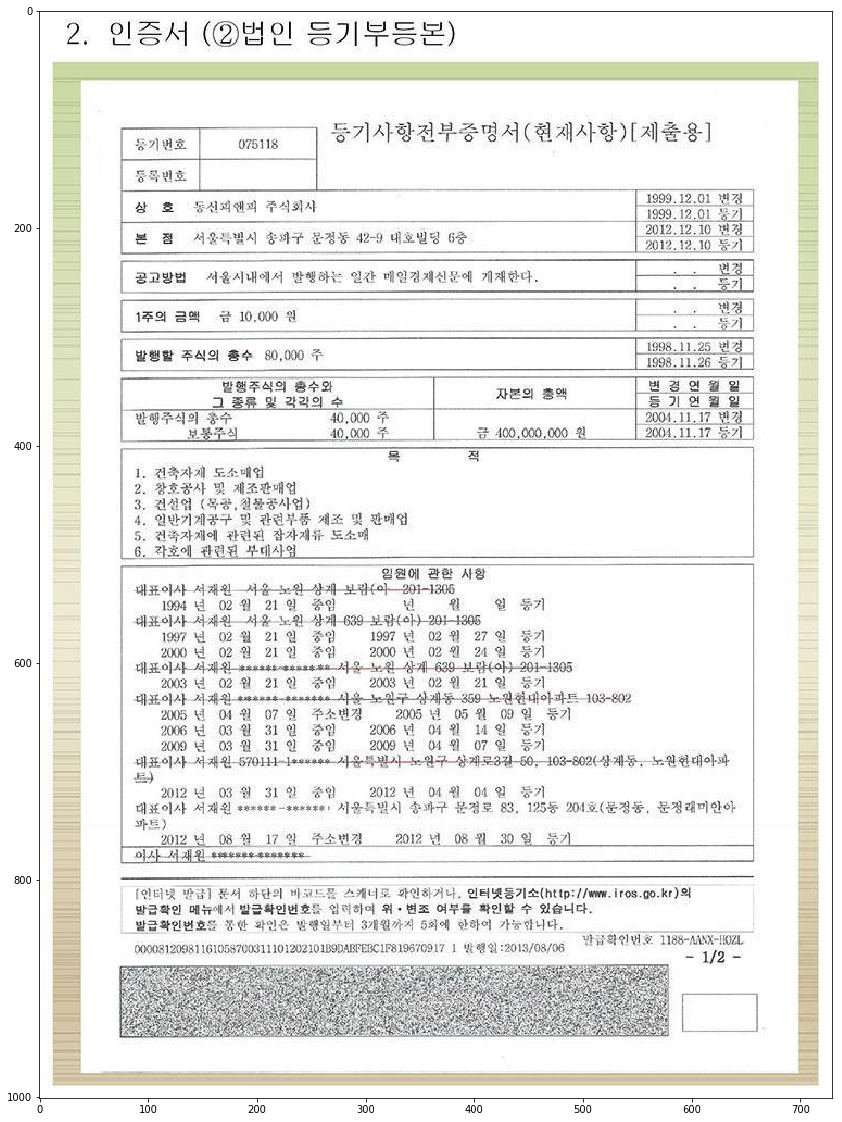

Wall time: 22.7 s
text0
2
text1
인증서(@법인등기부등본)
text2
승기번호
text3
0751ls
text4
등기사항전부증명서(현재사항)[제출용]

페이지 번호 2


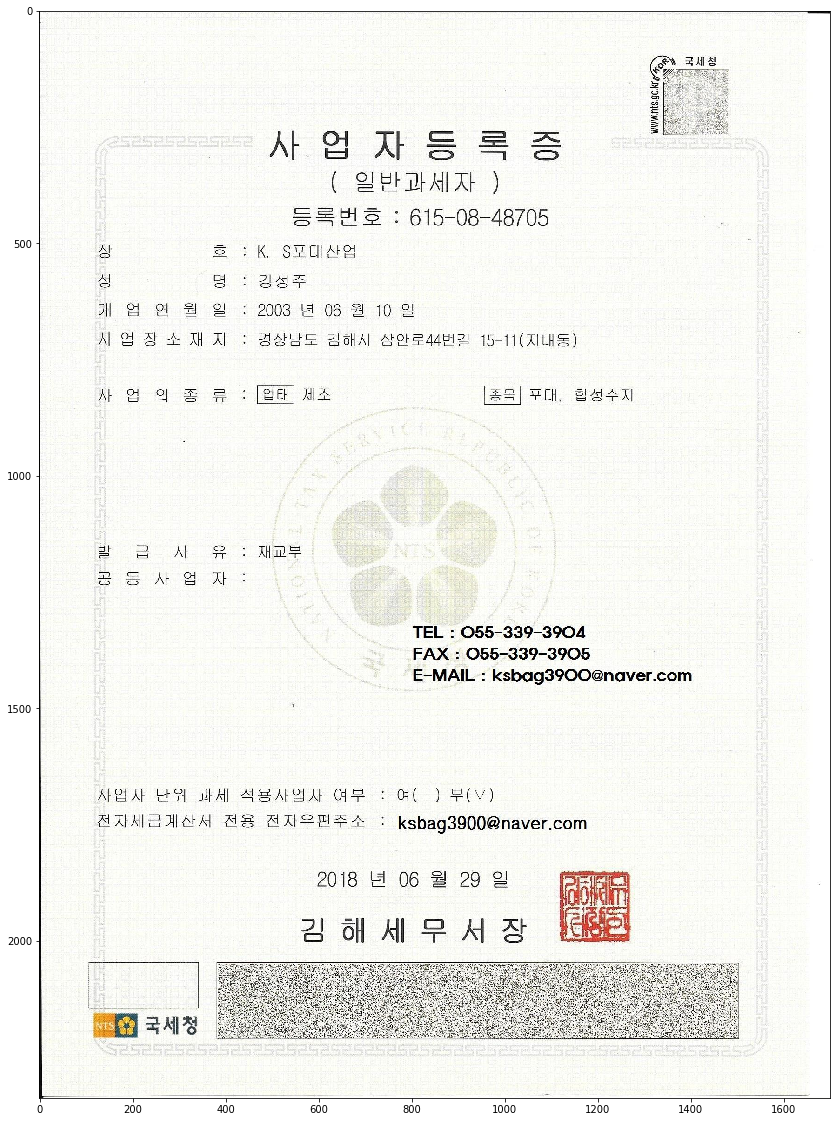

Wall time: 49.6 s
text0
국세청
text1
통
text2
물
text3
사업자등록증

페이지 번호 3


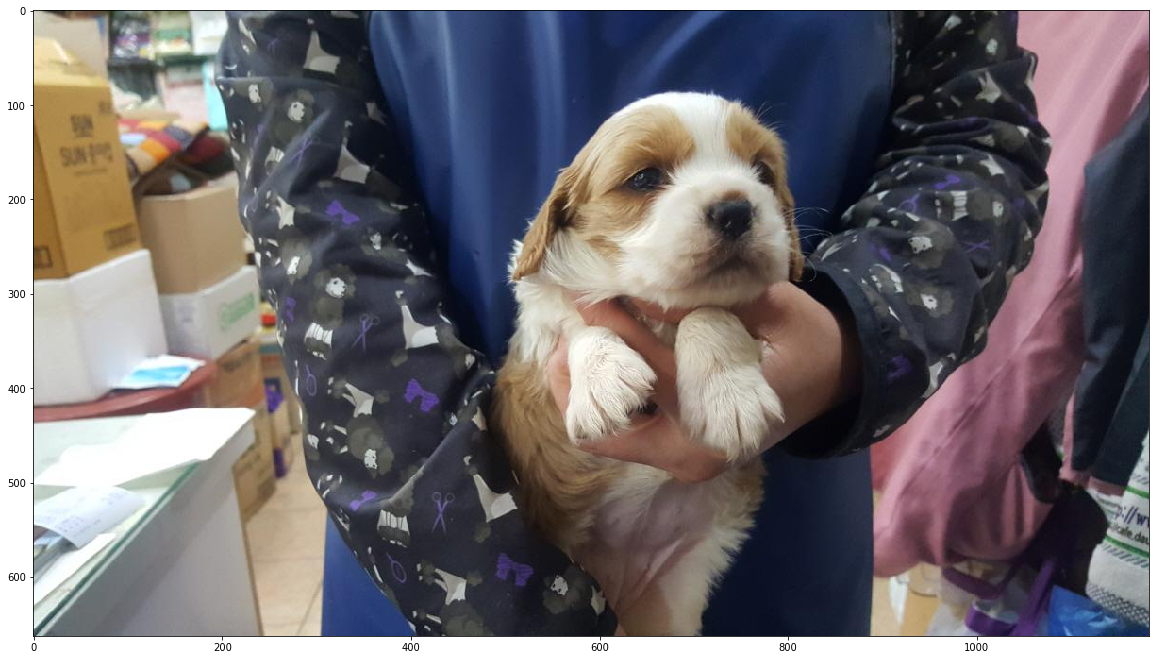

Wall time: 8.64 s

페이지 번호 4


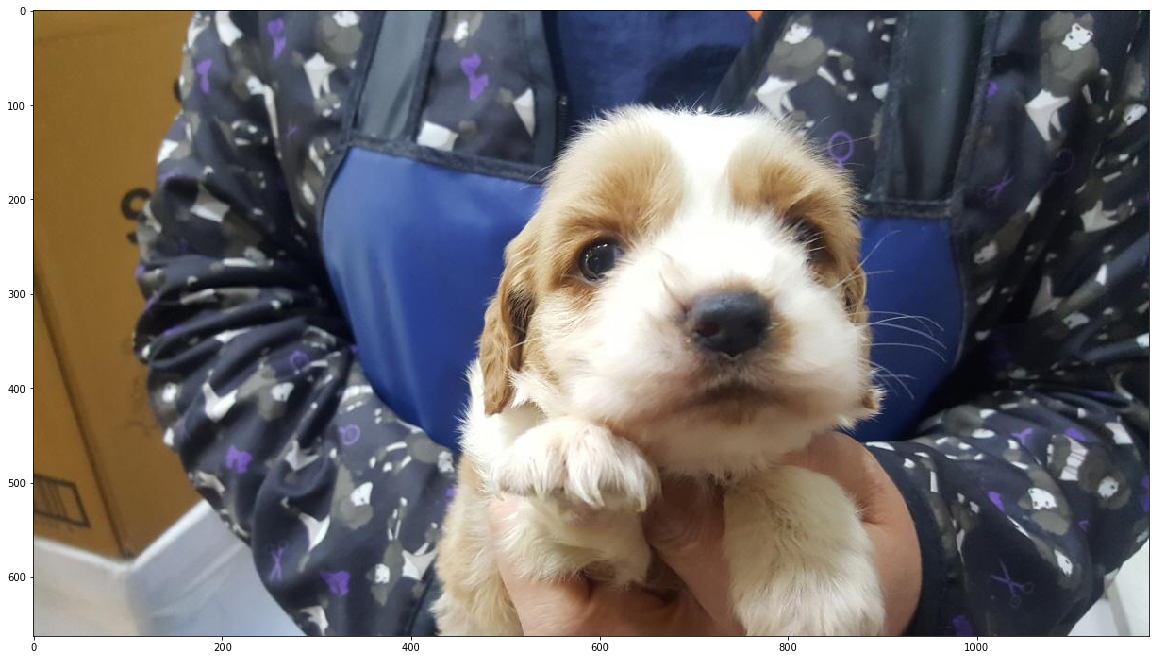

Wall time: 8.87 s

페이지 번호 5


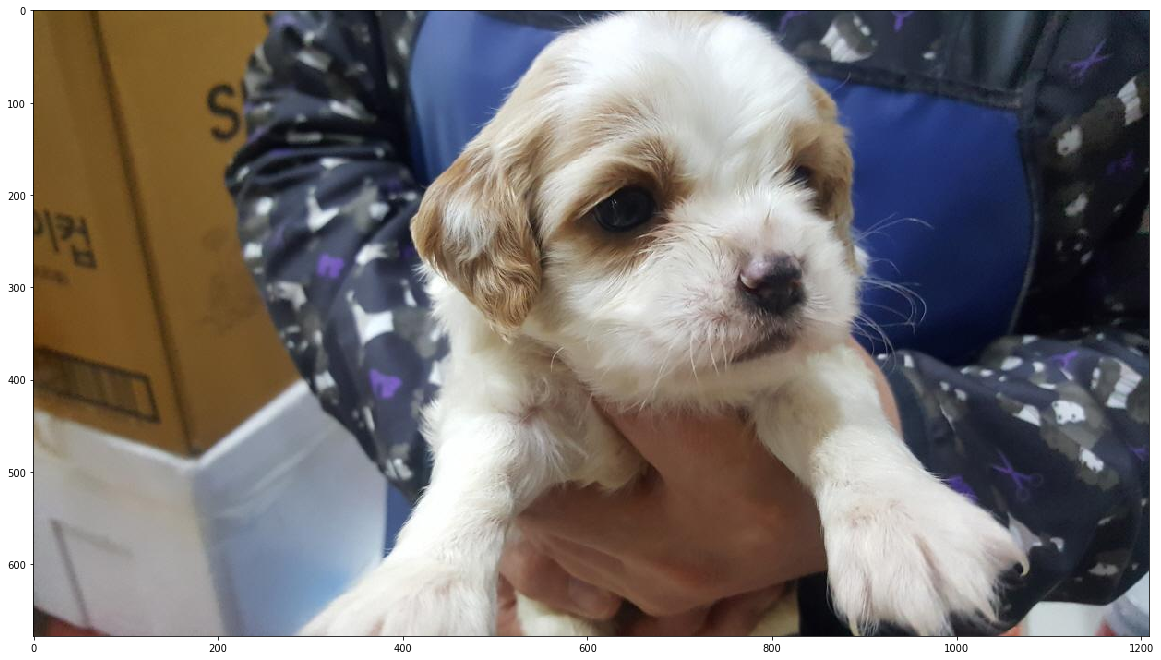

Wall time: 9.31 s
text0
겁

페이지 번호 6


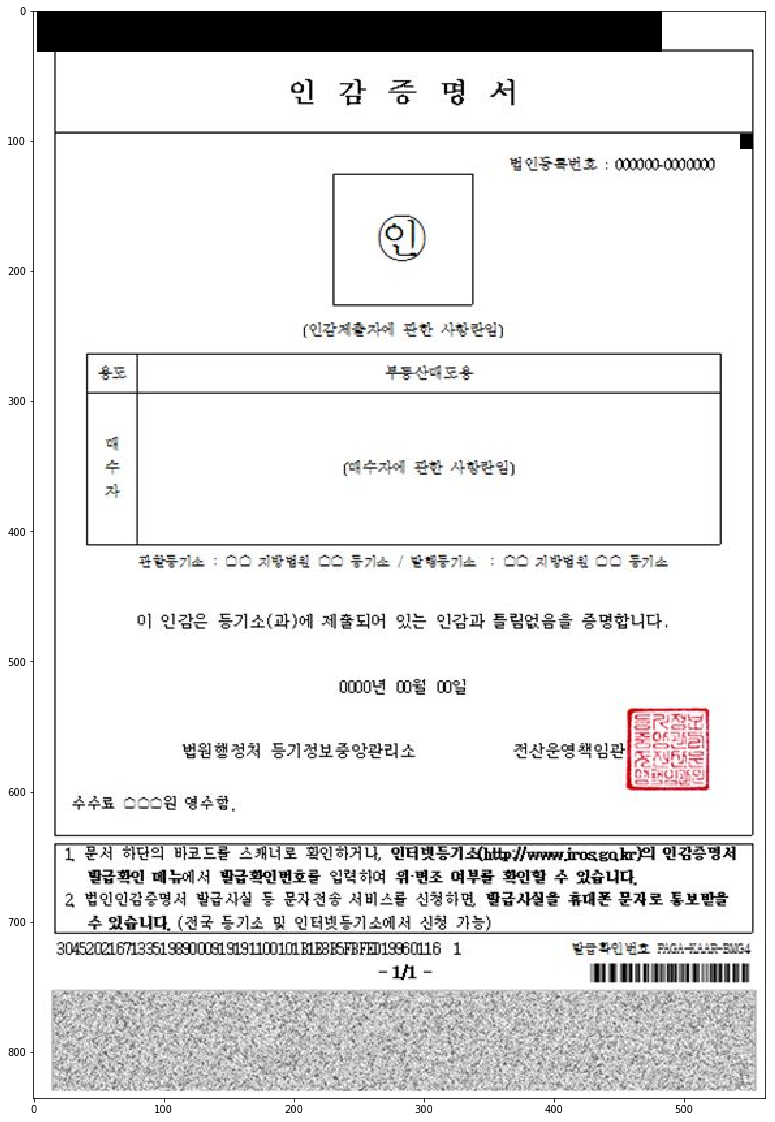

Wall time: 10.5 s
text0
인감증명서


In [10]:
for i in range(img.n_frames):
    
    img.seek(i)
    #img.save(f'{image_path[:-5]}_{i}.jpg')
    #print(img)
    print("\n페이지 번호 {}".format(i))
    plt.imshow(img)
    plt.show()
    img_array = np.array(img)
    %time result = reader.readtext(img_array)
    text = 'x'
    
    for j in range(len(result)):
        print("text{}".format(j))
        print(result[j][1].replace(' ',''))
        
        if "등기사항전부증명서" in result[j][1].replace(' ',''):
            text = "등기"
            break
        
        elif "사업자등록증" in result[j][1].replace(' ','')  :
            #print(result[j][1].replace(' ',''))
            text = "사업자등록증"
            break
        
        elif "주주명부" in result[j][1].replace(' ','')  :
            #print(result[j][1].replace(' ',''))
            text = "주주명부"
            break
        
        #elif "정관" in result[j][1].replace(' ','')  :
        #    #print(result[j][1].replace(' ',''))
        #    text = "정관"
        #    break
        
        elif "인감증명서" in result[j][1].replace(' ','')  :
            #print(result[j][1].replace(' ',''))
            text = "인감증명서"
            break


    
    nogada_df = nogada_df.append({"id":image_path, "page":i, "class":text}, ignore_index=True)

In [15]:
nogada_df

id page   class
0  Merged_document.tiff    0    주주명부
1  Merged_document.tiff    1      등기
2  Merged_document.tiff    2  사업자등록증
3  Merged_document.tiff    3       x
4  Merged_document.tiff    4       x
5  Merged_document.tiff    5       x
6  Merged_document.tiff    6   인감증명서